In [1]:
%matplotlib inline
import utils,os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyperplot as ppp
import h5py


import settings,warnings
mk=ppp.Marker('fig.yml')
warnings.filterwarnings("ignore")
aa=np.asarray


In [2]:
folder='subj_csv_data'
subjects=['s01','s02','s03','s06','s08','s09','s10','s12','s13','s15']
subject='All Subjects'
len_subjects=len(subjects)
def reload():
    global avd
    importlib.reload(utils)
    avd=utils.AnalysisIterData(folder,subjects)
reload()
figures_folder="figs/synthesis_all"
if not os.path.exists(figures_folder):
    os.mkdir(figures_folder)

# Figure 5C

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


pearsonr (0.830246862997158, 0.0029439101658470957)
spearmanr SpearmanrResult(correlation=0.9151515151515152, pvalue=0.0002044724061488323)
figure used in paper is stored in paper_figs/fig5/C.svg


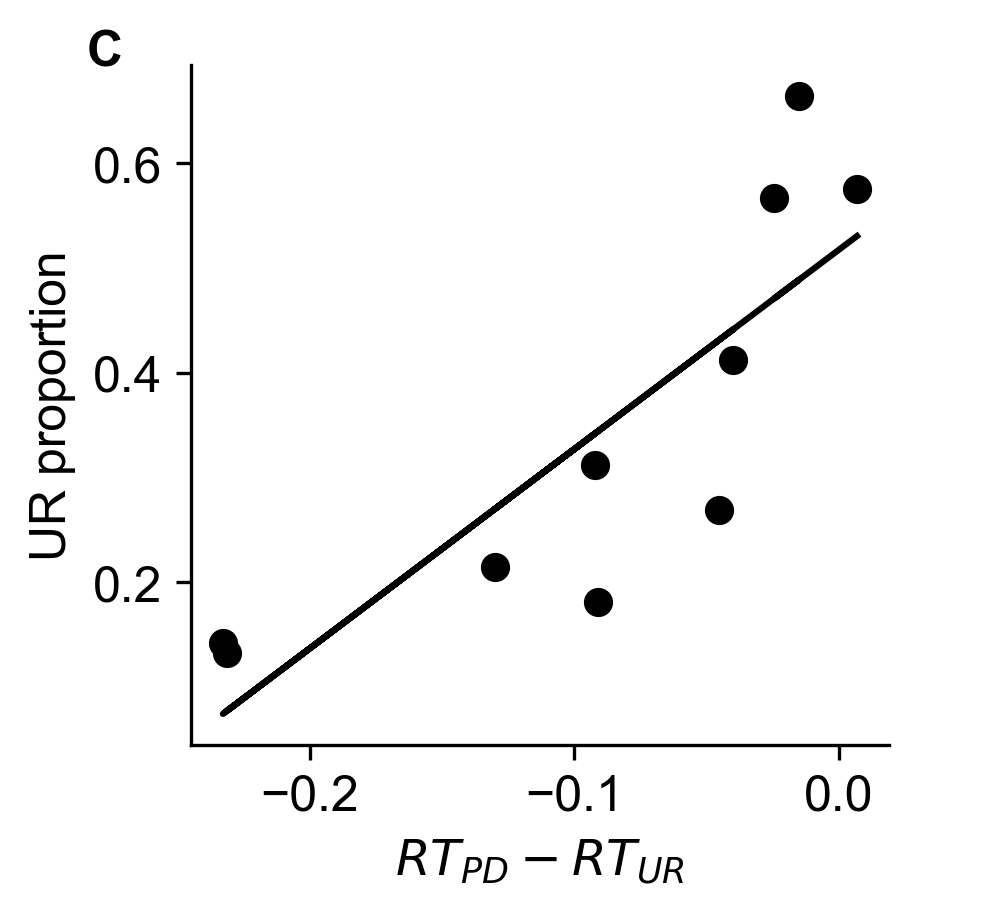

In [3]:
with ppp.SF("%s_RTdiffURprop_opt"%subject,figures_folder,mk,figsize=(3,3)) as (fig,axes):
    avd.plot_RTdiffURprop(axes,data=['opt-up lr','opt-up up','opt-up'],stat=True)
    utils.axSet(axes,xlabel="$RT_{PD}-RT_{UR}$",ylabel="UR proportion")

# Figure S4A

In [4]:
following_oa=False
params=[]
params_std=[]
for subj in subjects:
    fitted=h5py.File(f"VUE/res/{subj}/bps.jld","r")
    params.append(fitted['best_params'][()])
    fitted_std=h5py.File(f"VUE/res/{subj}/bps.jld","r") if following_oa \
        else h5py.File(f"VUE/res/{subj}/bps_std.jld","r")
    params_std.append(fitted_std['best_params'][()])
params=aa(params)
params_std=aa(params_std)

In [5]:
import statsmodels.api as sm
fitteds=[np.load(f"connect/data/{subj}.npy",allow_pickle=True).tolist() for subj in subjects]
rt_diff=[fitteds[i]["point"]['rt_diff_opt-lr-up_norm']for i in range(len(subjects))]
UR_props=[fitteds[i]["point"]['UR_prop']for i in range(len(subjects))]

figs/synthesis_all/All Subjects_fitted_RTdiff_URprop.svg figs/synthesis_all/All Subjects_fitted_RTdiff_URprop.svg
figure used in paper is stored in paper_figs/supp/fig4/A.svg


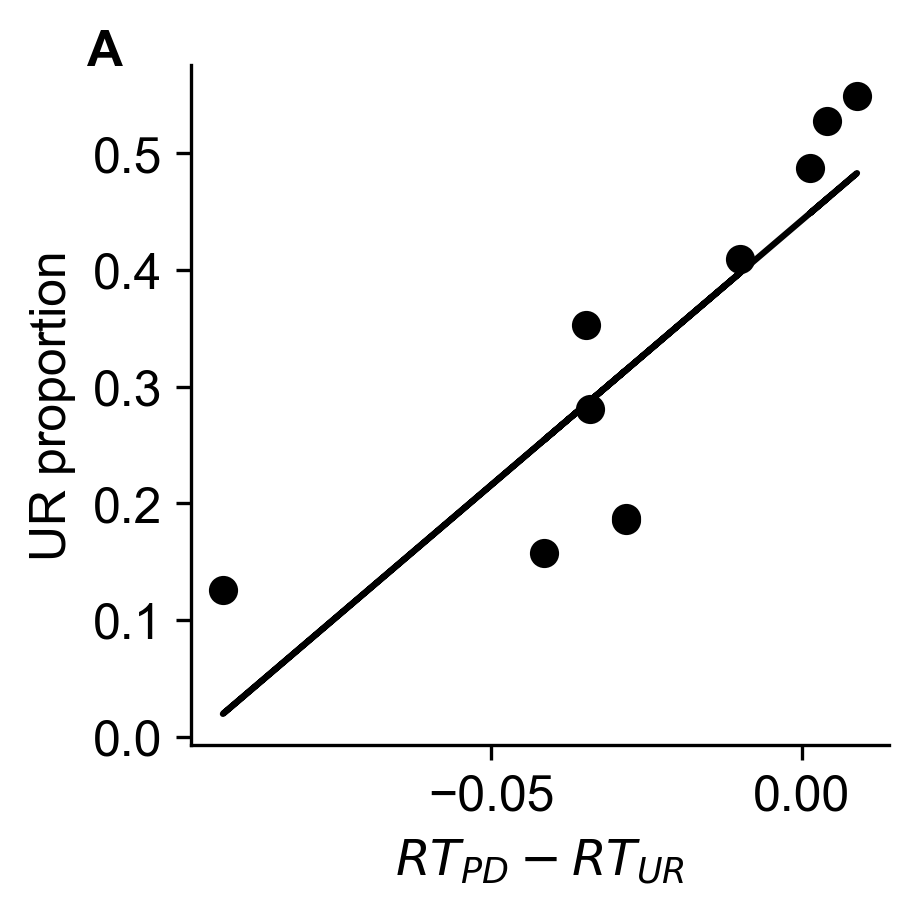

In [6]:
with ppp.SF("%s_fitted_RTdiff_URprop"%subject,figures_folder,mk,figsize=(3,3)) as (fig,ax):

    ax.scatter(rt_diff,UR_props,color='k')
    model=sm.OLS(UR_props,sm.add_constant(rt_diff)).fit()
    ax.plot(rt_diff,model.predict(sm.add_constant(rt_diff)),color='k')
    ax.set_xlabel('$RT_{PD}-RT_{UR}$')
    ax.set_ylabel('UR proportion')

# Figure S4D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


figs/synthesis_all/All Subjects_Rdiff_avgAccdiff.svg figs/synthesis_all/All Subjects_Rdiff_avgAccdiff.svg
figure used in paper is stored in paper_figs/supp/fig4/D.svg


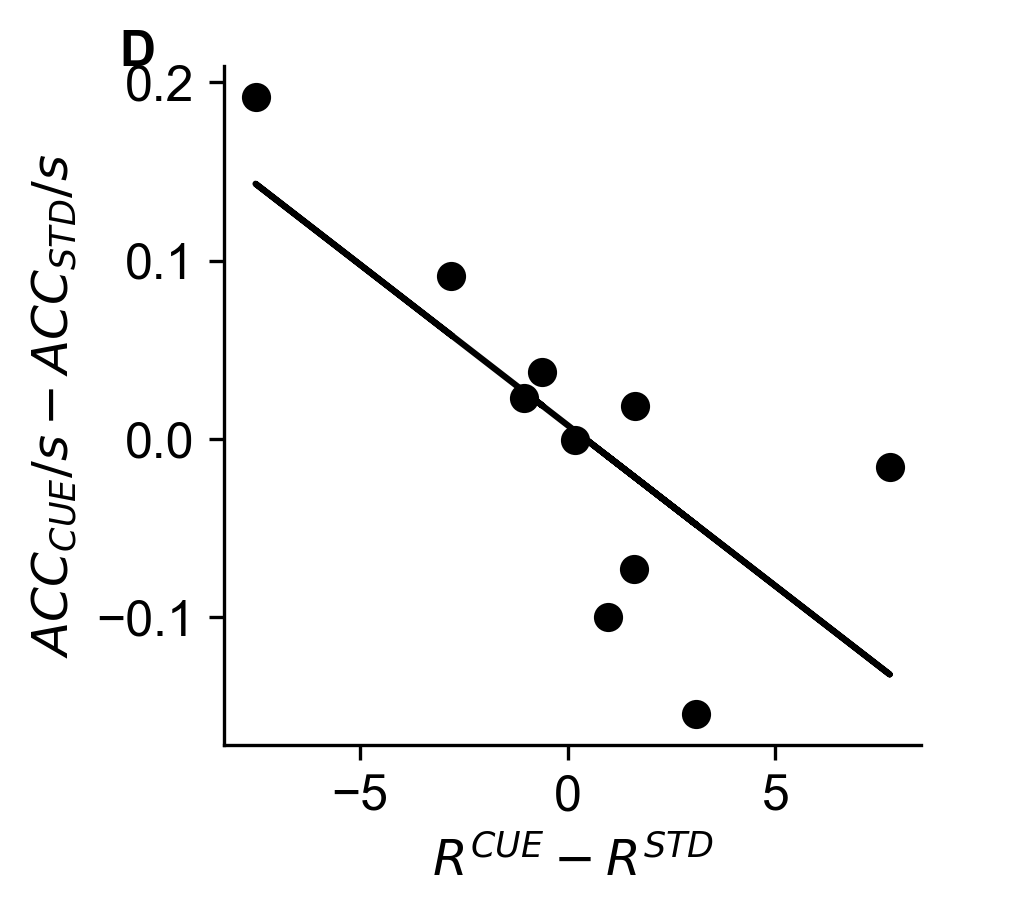

In [7]:
with ppp.SF(f"{subject}_Rdiff_avgAccdiff",figures_folder,mk,figsize=(3,3)) as (fig,axes):
    avd.plot_Rdiff_avgAccdiff(axes,params[:,1],params_std[:,1],data=['no-up','opt-up'],remove_up026=False)
    utils.axSet(axes,xlabel="$R^{CUE}-R^{STD}$",ylabel="$ACC_{CUE}/s-ACC_{STD}/s$")

# Figure 5A

figure used in paper is stored in paper_figs/fig5/A.svg


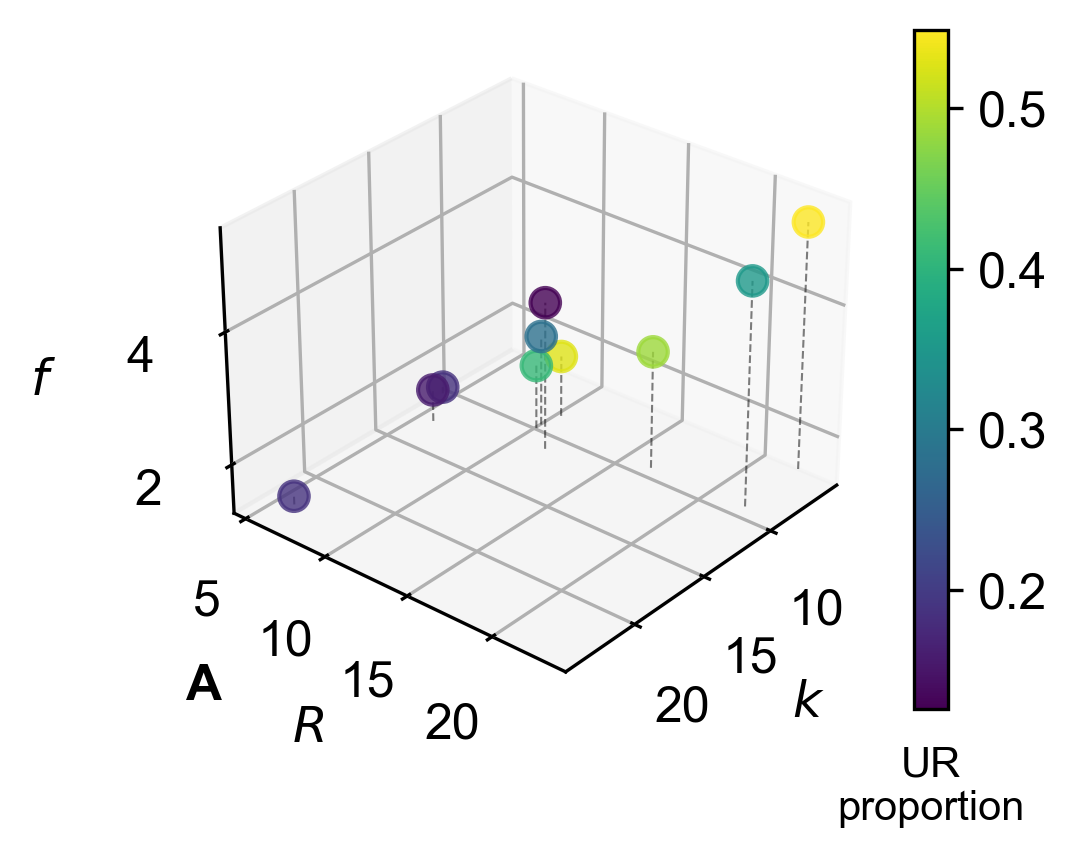

In [8]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

def scatter2d(x,y,z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z)
    ax.set(xlabel='PC1',ylabel='PC2',zlabel='UR proportion')
    ax.view_init(0,90)
    plt.show()
def scatter3d(fig,ax,x,y,z, cs, term,colorsMap='viridis',precision='.1',y_pos=-0.2):
    cm = plt.get_cmap(colorsMap)
    cNorm = mpl.colors.Normalize(vmin=np.min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    for i in range(len(x)):
        ax.plot([x[i],x[i]],[y[i],y[i]],[np.min(z)-0.1,z[i]],'--',c='k',alpha=0.5,linewidth=0.5)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs),s=50,alpha=0.8) # s=20+cs*180
    ax.set(xlabel='$k$',ylabel='$R$',zlabel='$f$')
    scalarMap.set_array(cs)
    cbar=fig.colorbar(scalarMap)
    barfmt=f"%{precision}f"
    cbar.ax.set_yticklabels([barfmt%(i) for i in cbar.get_ticks()])
    cbar.ax.set_title(term,y=y_pos,fontsize=10)

    ax.view_init(30,40)
neat_params=np.c_[params[:,0:2],params[:,4]]
with ppp.SF("PARAM_UR_3D",figures_folder,mk, subplot_kw={"projection": "3d"},figsize=(4,3)) as (fig,ax):
    scatter3d(fig,ax,neat_params[:,0],
        neat_params[:,1],
        neat_params[:,2],aa(UR_props),'UR\nproportion')

# Figure S5A

figs/synthesis_all/PARAM_RTdiff_3D.svg figs/synthesis_all/PARAM_RTdiff_3D.svg
figure used in paper is stored in paper_figs/supp/fig5/A.svg


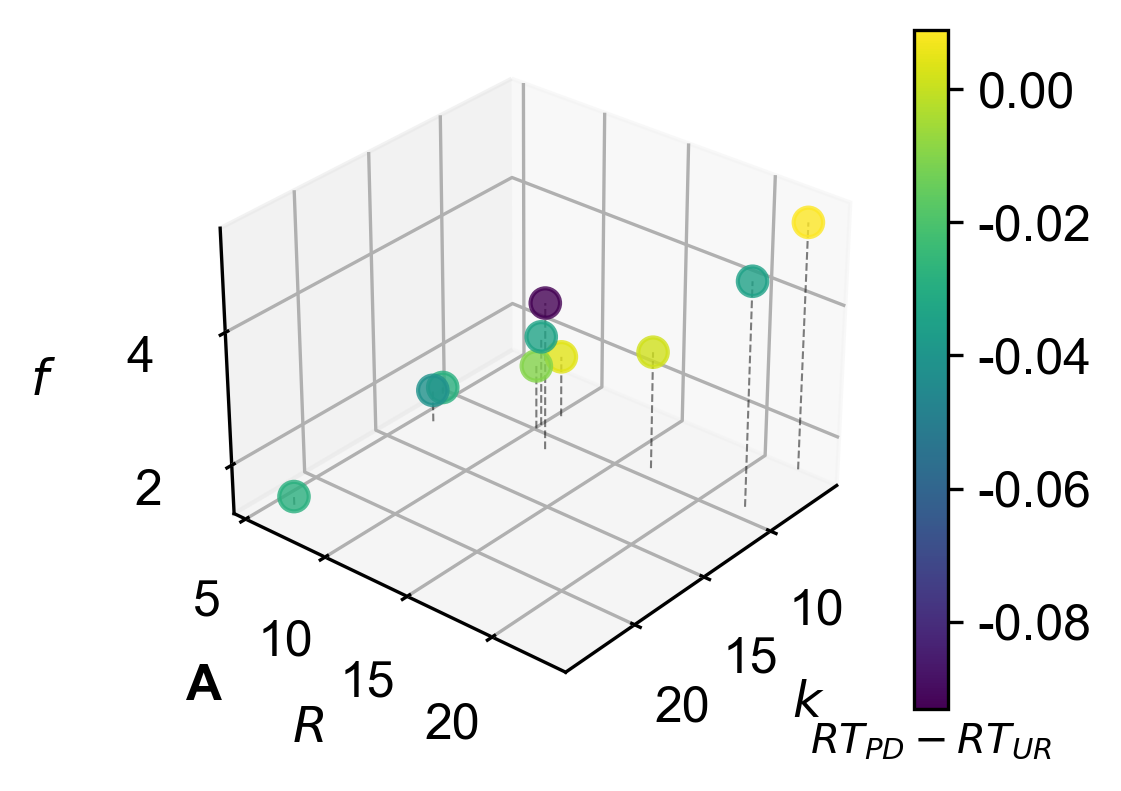

In [9]:
with ppp.SF("PARAM_RTdiff_3D",figures_folder,mk, subplot_kw={"projection": "3d"},figsize=(4,3)) as (fig,ax):
    scatter3d(fig,ax,neat_params[:,0],
        neat_params[:,1],
        neat_params[:,2],aa(rt_diff),'$RT_{PD}-RT_{UR}$',precision='.2',y_pos=-0.1)